# **Arabic Object Character Recognition using tesseract**
#### *By: Raghad Salem*

Use and evaluate arabic OCR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/MyDrive/arabic-texts'

In [ ]:
!pip install openpyxl


## Import libraries

In [ ]:
import cv2
from PIL import Image
import os
from google.colab.patches import cv2_imshow
from pathlib import Path
import pandas as pd
import base64
from openpyxl import Workbook
from openpyxl.drawing.image import Image
import io
from IPython.display import display, HTML


# Tessaract OCR

## Installing Tessaract

In [ ]:
%%capture
# Install pytesseract
!pip install pytesseract

# Install Tesseract OCR engine
!sudo apt-get install tesseract-ocr-ara  #for english


In [ ]:
tessdata_prefix = '/usr/share/tesseract-ocr/4.00/tessdata'  # Replace with the correct path in your Colab environment
os.environ['TESSDATA_PREFIX'] = tessdata_prefix


In [ ]:
import pytesseract

## OCR

In [ ]:
# function to extract image - tesseract image - text in the image
def arabic_ocr_tesseract(image_path):
    image = cv2.imread(image_path)          #reading the image
    preprocess_image = image.copy()         #creating copy of the original image
    tesseract_image = image.copy()
    gray_image = cv2.cvtColor(preprocess_image, cv2.COLOR_BGR2GRAY)     # Converting to grayscale
    _, thresholded_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
    custom_config = r'--oem 3 --psm 6 -l ara'  # Arabic language configuration
    text = pytesseract.image_to_string(thresholded_image, config=custom_config)         # Extracting text
    text_data = pytesseract.image_to_data(thresholded_image, config=custom_config, output_type=pytesseract.Output.DICT)
    # Iterate over each detected word and draw bounding boxes
    for i in range(len(text_data['text'])):
        (x, y, w, h) = (text_data['left'][i], text_data['top'][i], text_data['width'][i], text_data['height'][i])
        cv2.rectangle(tesseract_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Bounding box in green

    return image,tesseract_image,text

In [ ]:
#functions to style the display images and texts
def resize_image(image, target_width):
    height, width, _ = image.shape
    aspect_ratio = target_width / width
    new_height = int(height * aspect_ratio)
    resized_image = cv2.resize(image, (target_width, new_height))
    return resized_image

def image_to_base64(image):
    _, buffer = cv2.imencode('.jpg', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    base64_image = base64.b64encode(buffer).decode('utf-8')
    return base64_image

# Example usage to process all images in a folder
def process_images_in_folder(folder_path, target_width=400):
    image_data = []
    html_code = ''

    for image_path in Path(folder_path).glob('*.jpg'):  # Assuming images are in JPG format
        original_image, processed_image, extracted_text = arabic_ocr_tesseract(str(image_path))

        # Resize images
        resized_original = resize_image(original_image, target_width)
        resized_processed = resize_image(processed_image, target_width)

        original_base64 = image_to_base64(resized_original)
        processed_base64 = image_to_base64(resized_processed)

        # Add HTML code to display images in the same line
        html_code += f'<img src="data:image/jpg;base64,{original_base64}" style="margin:0px"/>'
        html_code += f'<img src="data:image/jpg;base64,{processed_base64}" style="margin:0px"/>'

        # Display extracted text
        html_code += f'<p style="margin:0px">Extracted Text: {extracted_text}</p>'
        html_code += "=" * 140
        html_code += "=" * 140


        image_data.append({
            'image': original_base64,
            'extracted_image': processed_base64,
            'extracted_text': extracted_text
        })

    display(HTML(html_code))
    return pd.DataFrame(image_data)


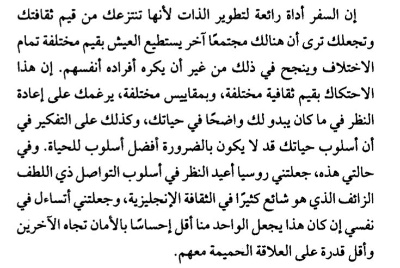
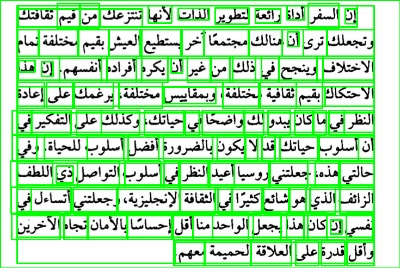
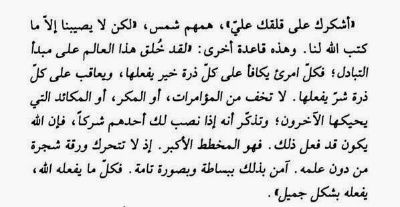
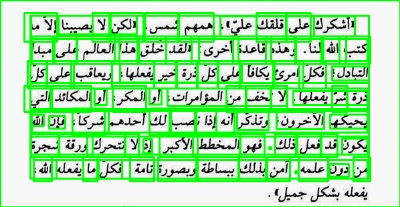
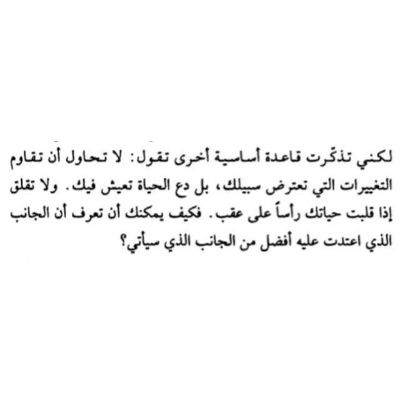
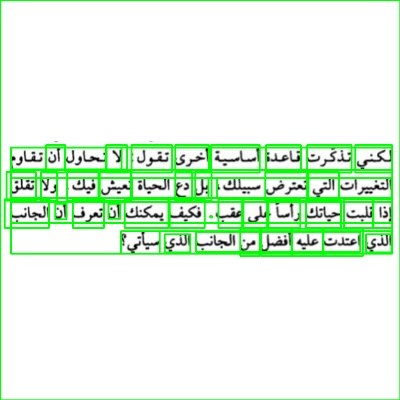
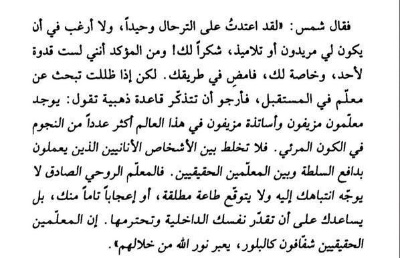
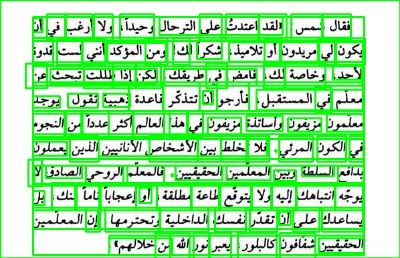
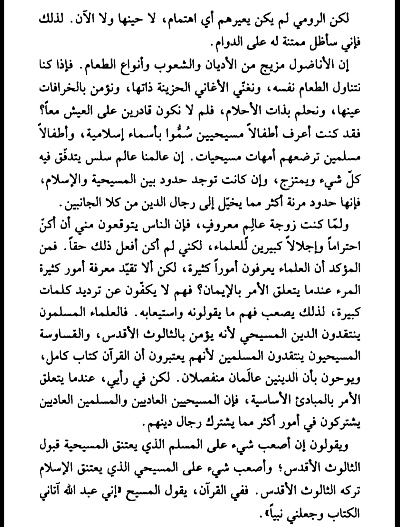
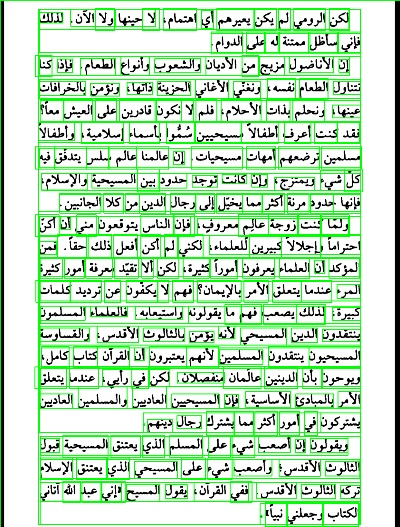
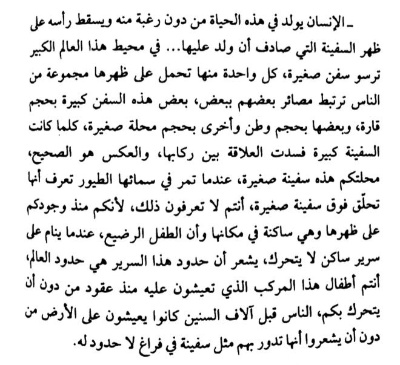
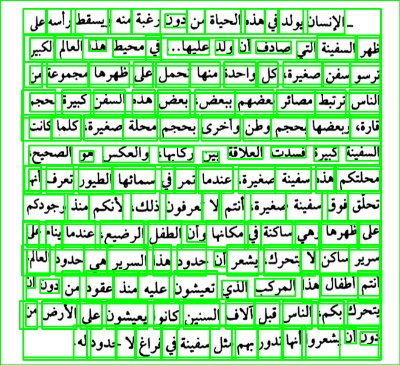
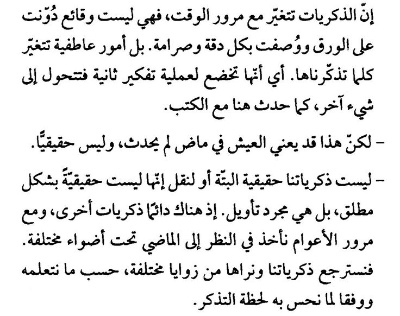
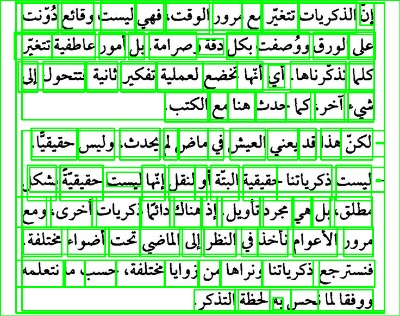
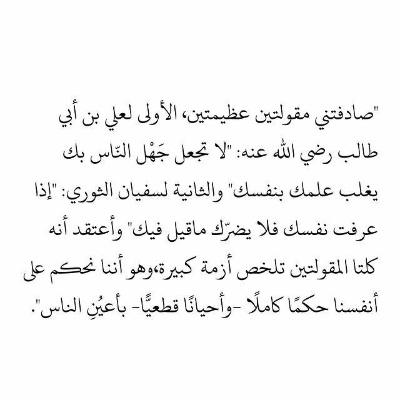
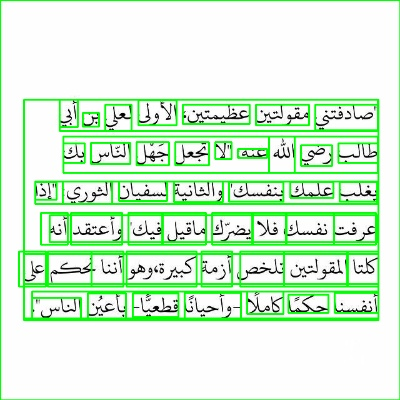
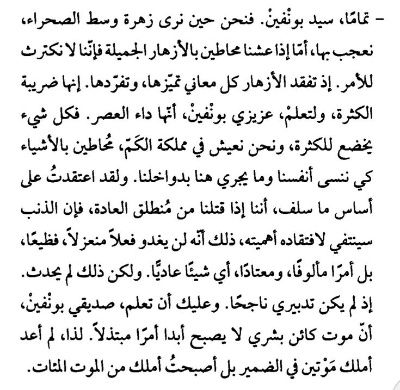
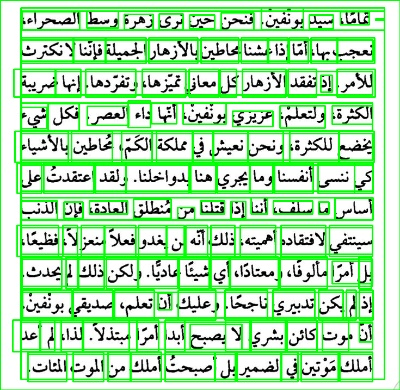
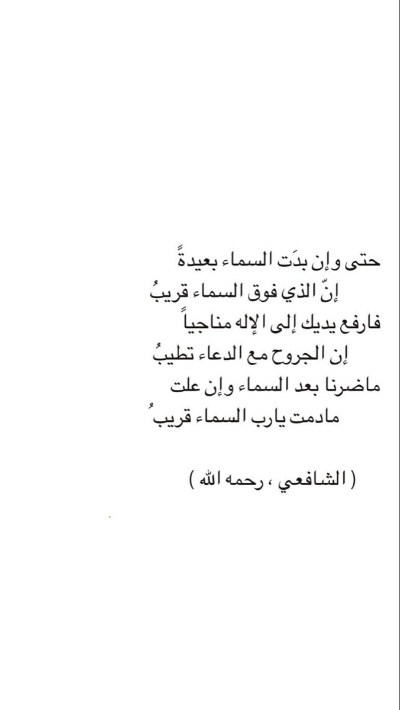
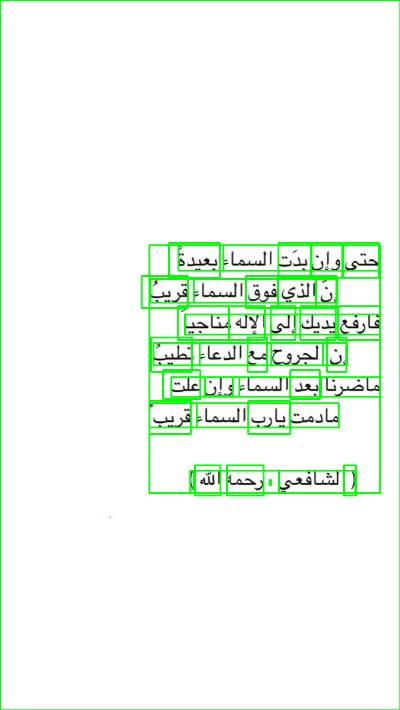
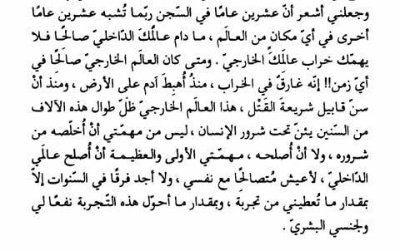
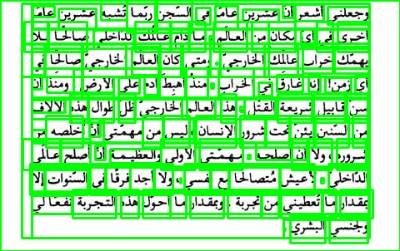
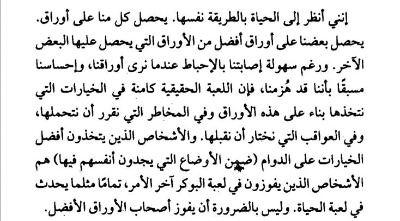
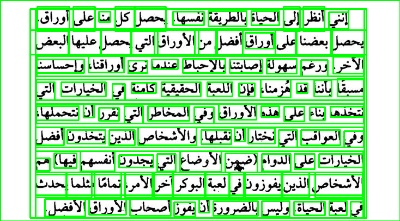
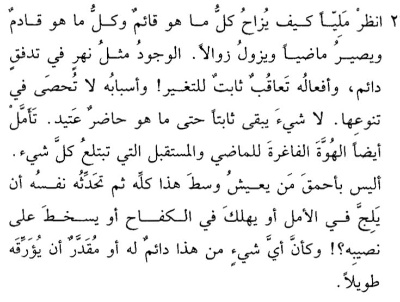
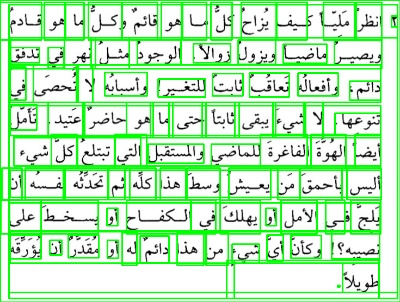
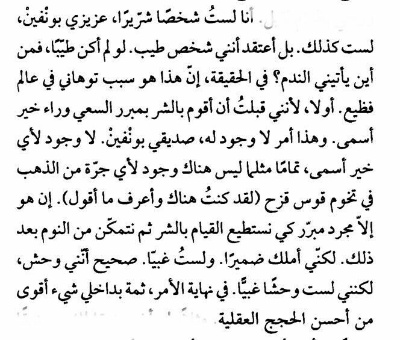
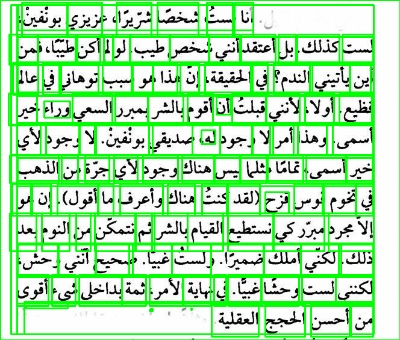

In [ ]:
df = process_images_in_folder(folder_path)